# A/B Testing

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

## Dataset

Contains information about players participated in A/B test.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
dataset = pd.read_csv('ab_test/cookie_cats.csv')

In [3]:
dataset.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

Columns: <br/>
userid - unique user id <br/>
version - control group (gate30 version or gate40)<br/>
sum_gamerounds - rounds played by user in 14 days after game installed<br/>
retention_1 - did user comeback 1 day after installing?<br/>
retention_7 - did user comeback 7 days after installing?

## Experiment

### Goal

Detect whether new level gate will increase retention rate.

### Metrics

We'll use 2 metrics: retention rate 7 dats after installing and 1 day after installing.

### Hypothesis

**If we increase gate level (level at which game will force players to wait or make in-app purchase) the retention rate will increase as well**  <br>

Null hypothesis: changing gates do not affect on retention rate. <br>
Alternate hypothesis: changing gates affect on retention rate.

We are assuming that control and expremental groups are independent and got their first gate randomly.

### Statistical significance

**p = 0.05**

In [4]:
p_value = 0.05

## EDA

In [5]:
dataset.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<AxesSubplot:xlabel='version', ylabel='count'>

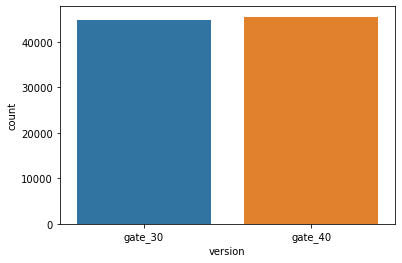

In [6]:
sns.countplot(data=dataset, x='version')

Groups are approximately the same size.

### Outliers

We'll exclude all the players whose game rounds are beyond 0.99 quantile.

In [7]:
dataset = dataset[dataset['sum_gamerounds'] < dataset['sum_gamerounds'].quantile(0.99)]

<AxesSubplot:xlabel='sum_gamerounds'>

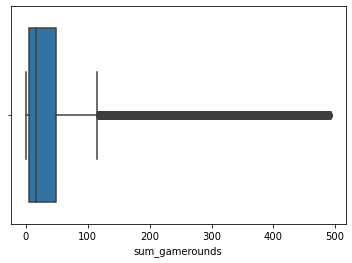

In [8]:
sns.boxplot(data=dataset, x='sum_gamerounds')

## Hypothesis testing

<AxesSubplot:xlabel='retention_1', ylabel='count'>

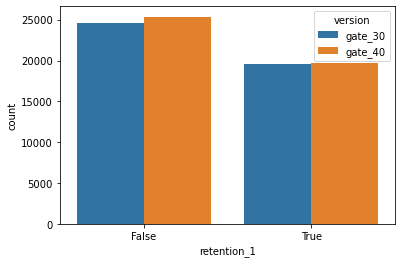

In [9]:
sns.countplot(data=dataset, x='retention_1', hue='version')

<AxesSubplot:xlabel='retention_7', ylabel='count'>

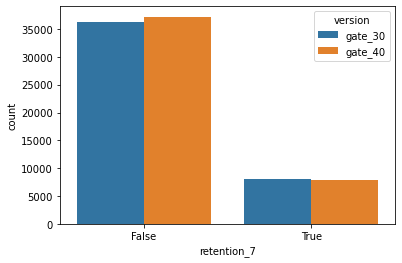

In [10]:
sns.countplot(data=dataset, x='retention_7', hue='version')

### Retention day 1

In [11]:
gate_30_comeback = len(dataset[(dataset['version'] == 'gate_30') & (dataset['retention_1'] == True)])
gate_30_no_comeback = len(dataset[(dataset['version'] == 'gate_30') & (dataset['retention_1'] == False)])
gate_40_comeback = len(dataset[(dataset['version'] == 'gate_40') & (dataset['retention_1'] == True)])
gate_40_no_comeback = len(dataset[(dataset['version'] == 'gate_40') & (dataset['retention_1'] == False)])

In [12]:
contigency_table = np.array([[gate_30_comeback, gate_30_no_comeback],
                             [gate_40_comeback, gate_40_no_comeback]])
contigency_table

array([[19596, 24653],
       [19674, 25360]])

In [13]:
print('Control group retention - ', str(gate_30_comeback / (gate_30_comeback + gate_30_no_comeback)))
print('Experimental group retention - ', str(gate_40_comeback / (gate_40_comeback + gate_40_no_comeback)))

Control group retention -  0.44285746570543966
Experimental group retention -  0.4368699205045077


In [14]:
if chi2_contingency(contigency_table)[1] >= p_value:
    print('p = ', str(chi2_contingency(contigency_table)[1]))
    print('No statistical significant difference')
else:
    print('p = ', str(chi2_contingency(contigency_table)[1]))
    print('Null hypothesis is rejected')

p =  0.07259387684744877
No statistical significant difference


**There is not enough statistical evidence that changing gates affect retention after day 1.**

### Retention day 7

In [15]:
gate_30_comeback = len(dataset[(dataset['version'] == 'gate_30') & (dataset['retention_7'] == True)])
gate_30_no_comeback = len(dataset[(dataset['version'] == 'gate_30') & (dataset['retention_7'] == False)])
gate_40_comeback = len(dataset[(dataset['version'] == 'gate_40') & (dataset['retention_7'] == True)])
gate_40_no_comeback = len(dataset[(dataset['version'] == 'gate_40') & (dataset['retention_7'] == False)])

In [16]:
contigency_table = np.array([[gate_30_comeback, gate_30_no_comeback],
                             [gate_40_comeback, gate_40_no_comeback]])
contigency_table

array([[ 8073, 36176],
       [ 7842, 37192]])

In [17]:
print('Control group retention - ', str(gate_30_comeback / (gate_30_comeback + gate_30_no_comeback)))
print('Experimental group retention - ', str(gate_40_comeback / (gate_40_comeback + gate_40_no_comeback)))

Control group retention -  0.18244480101245225
Experimental group retention -  0.17413509792601145


In [18]:
if chi2_contingency(contigency_table)[1] >= p_value:
    print('p = ', str(chi2_contingency(contigency_table)[1]))
    print('No statistical significant difference')
else:
    print('p = ', str(chi2_contingency(contigency_table)[1]))
    print('Null hypothesis is rejected')

p =  0.0012167914022157245
Null hypothesis is rejected


**The difference is statistical significant, so we can conclude that changing gates increase retention day 7**